In [21]:
from pathlib import Path
import xtgeo

In [22]:
fns = ["data/grane/real4d_maps/MN-PRM10-5_oct19-may17.irapbin",
       "data/grane/real4d_maps/MN-PRM5-0_may17-oct14.irapbin",
       "data/grane/real4d_maps/MN-PRM9-7_may19-may18.irapbin",
       "data/grane/real4d_maps/MP-PRM10-1_oct19-may15.irapbin",
       "data/grane/real4d_maps/MP-PRM10-5_oct19-may17.irapbin",
       "data/grane/real4d_maps/MP-PRM10-9_oct19-may19.irapbin"
]
fns = [Path(fn) for fn in fns]



In [23]:
surfs = [xtgeo.RegularSurface(str(s)) for s in fns]

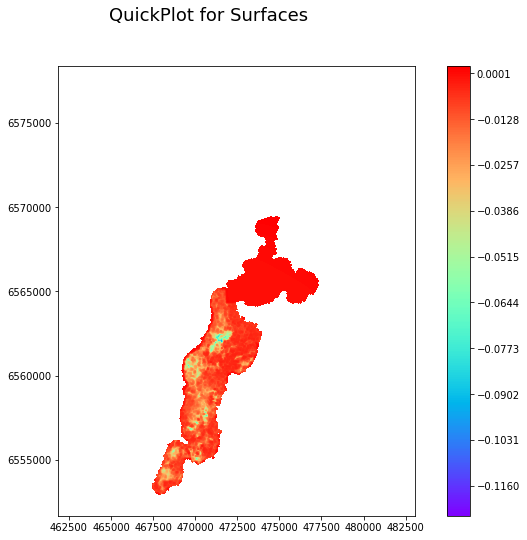

In [25]:
surfs[0].quickplot()

In [26]:
#Make images
imgs = [fn.with_suffix('.png') for fn in fns]
[s.quickplot(img) for s, img in zip(surfs, imgs)]

[None, None, None, None, None, None]

In [27]:
import io
import base64

import numpy as np
from matplotlib import cm
from PIL import Image

def get_surface_arr(surface, unrotate=True, flip=True):
    if unrotate:
        surface.unrotate()
    x, y, z = surface.get_xyz_values()
    if flip:
        x = np.flip(x.transpose(), axis=0)
        y = np.flip(y.transpose(), axis=0)
        z = np.flip(z.transpose(), axis=0)
    return [x, y, z]


def array_to_png(tensor, fn, shift=True, colormap=False):
    """The layered map dash component takes in pictures as base64 data
    (or as a link to an existing hosted image). I.e. for containers wanting
    to create pictures on-the-fly from numpy arrays, they have to be converted
    to base64. This is an example function of how that can be done.

    1) Scale the input array (tensor) to the range 0-255.
    2) If shift=True and colormap=False, the 0 value in the scaled range
       is reserved for np.nan (while the actual data points utilize the
       range 1-255.

       If shift=True and colormap=True, the 0 value in the colormap range
       has alpha value equal to 0.0 (i.e. full transparency). This makes it
       possible for np.nan values in the actual map becoming transparent in
       the image.
    3) If the array is two-dimensional, the picture is stored as greyscale.
       Otherwise it is either stored as RGB or RGBA (depending on if the size
       of the third dimension is three or four, respectively).
    """

    tensor -= np.nanmin(tensor)

    if shift:
        tensor *= 254.0 / np.nanmax(tensor)
        tensor += 1.0
    else:
        tensor *= 255.0 / np.nanmax(tensor)

    tensor[np.isnan(tensor)] = 0

    if colormap:
        if tensor.shape[0] != 1:
            raise ValueError("The first dimension of a colormap tensor should be 1")
        if tensor.shape[1] != 256:
            raise ValueError("The second dimension of a colormap tensor should be 256")
        if tensor.shape[2] not in [3, 4]:
            raise ValueError(
                "The third dimension of a colormap tensor should be either 3 or 4"
            )
        if shift:
            if tensor.shape[2] != 4:
                raise ValueError(
                    "Can not shift a colormap which is not utilizing alpha channel"
                )
            tensor[0][0][3] = 0.0  # Make first color channel transparent

    if tensor.ndim == 2:
        image = Image.fromarray(np.uint8(tensor), "L")
        print(2)
    elif tensor.ndim == 3:
        if tensor.shape[2] == 3:
            print(3)
            image = Image.fromarray(np.uint8(tensor), "RGB")
        elif tensor.shape[2] == 4:
            print(4)
            image = Image.fromarray(np.uint8(tensor), "RGBA")
        else:
            raise ValueError(
                "Third dimension of tensor must have length 3 (RGB) or 4 (RGBA)"
            )
    else:
        raise ValueError("Incorrect number of dimensions in tensor")
    image.save(fn, format="png")


In [28]:
imgs = [f'data/{fn.stem}_8bit.png' for fn in fns]
[array_to_png(get_surface_arr(s)[2].copy(), img) for s, img in zip(surfs, imgs)]

2
2
2
2
2
2


[None, None, None, None, None, None]